https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017/blob/master/advanced-text-analysis.ipynb

http://clarkgrubb.com/nlp

# SpaCy

In [1]:
import spacy
nlp = spacy.load('en')

In [2]:
text = "Jules S. Damji is a Apache Spark Community Evangelist with Databricks. He is a hands-on developer with over 15 years of experience and has worked at leading companies building large-scale distributed systems. Before joining Databricks, he was a Developer Advocate at Hortonworks."

In [3]:
%time spacy_text = nlp(text)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 87.4 ms


## Sentence tokenization

In [4]:
from nltk.tokenize import sent_tokenize

In [5]:
list(spacy_text.sents)

[Jules S. Damji is a Apache Spark Community Evangelist with Databricks.,
 He is a hands-on developer with over 15 years of experience and has worked at leading companies building large-scale distributed systems.,
 Before joining Databricks, he was a Developer Advocate at Hortonworks.]

In [6]:
sent_tokenize(text)

['Jules S. Damji is a Apache Spark Community Evangelist with Databricks.',
 'He is a hands-on developer with over 15 years of experience and has worked at leading companies building large-scale distributed systems.',
 'Before joining Databricks, he was a Developer Advocate at Hortonworks.']

## Word tokenization

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
list(spacy_text.sents)[0]

Jules S. Damji is a Apache Spark Community Evangelist with Databricks.

In [9]:
list(spacy_text.sents)[0][5]

Apache

i - position in a whole text

In [10]:
list(spacy_text.sents)[0][15], list(spacy_text.sents)[0][15].i

(hands, 15)

In [11]:
list(spacy_text.sents)[1][15], list(spacy_text.sents)[1][15].i

(worked, 27)

In [12]:
len(list(spacy_text.sents)[0])

12

In [13]:
word_tokenize(text)

['Jules',
 'S.',
 'Damji',
 'is',
 'a',
 'Apache',
 'Spark',
 'Community',
 'Evangelist',
 'with',
 'Databricks',
 '.',
 'He',
 'is',
 'a',
 'hands-on',
 'developer',
 'with',
 'over',
 '15',
 'years',
 'of',
 'experience',
 'and',
 'has',
 'worked',
 'at',
 'leading',
 'companies',
 'building',
 'large-scale',
 'distributed',
 'systems',
 '.',
 'Before',
 'joining',
 'Databricks',
 ',',
 'he',
 'was',
 'a',
 'Developer',
 'Advocate',
 'at',
 'Hortonworks',
 '.']

## Word properties

In [14]:
dir(list(spacy_text.sents)[1][15])

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'has_repvec',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ancestor_of',
 'is_ascii',
 'is_bracket',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_space',
 'is_stop',
 'is_title',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 

## NER

In [15]:
spacy_text.ents

(Jules S. Damji,
 Apache Spark Community Evangelist,
 Databricks,
 15 years,
 Databricks)

In [16]:
spacy_text.ents[0], spacy_text.ents[0].label, spacy_text.ents[0].label_

(Jules S. Damji, 377, 'PERSON')

In [17]:
spacy_text.ents[2], spacy_text.ents[2].label, spacy_text.ents[2].label_

(Databricks, 377, 'PERSON')

In [18]:
from nltk import ne_chunk, tag

In [19]:
list(ne_chunk(tag.pos_tag(word_tokenize(text))))

[Tree('PERSON', [('Jules', 'NNP')]),
 ('S.', 'NNP'),
 ('Damji', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 Tree('ORGANIZATION', [('Apache', 'NNP'), ('Spark', 'NNP')]),
 ('Community', 'NNP'),
 ('Evangelist', 'NNP'),
 ('with', 'IN'),
 Tree('PERSON', [('Databricks', 'NNP')]),
 ('.', '.'),
 ('He', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('hands-on', 'JJ'),
 ('developer', 'NN'),
 ('with', 'IN'),
 ('over', 'IN'),
 ('15', 'CD'),
 ('years', 'NNS'),
 ('of', 'IN'),
 ('experience', 'NN'),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('worked', 'VBN'),
 ('at', 'IN'),
 ('leading', 'VBG'),
 ('companies', 'NNS'),
 ('building', 'VBG'),
 ('large-scale', 'JJ'),
 ('distributed', 'JJ'),
 ('systems', 'NNS'),
 ('.', '.'),
 ('Before', 'IN'),
 ('joining', 'VBG'),
 Tree('PERSON', [('Databricks', 'NNP')]),
 (',', ','),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 Tree('ORGANIZATION', [('Developer', 'NNP'), ('Advocate', 'NNP')]),
 ('at', 'IN'),
 Tree('ORGANIZATION', [('Hortonworks', 'NNP')]),
 ('.', '.')]

NLTK find more entities but worse extract them then SpaCy

## POS-tagging

In [20]:
[(x, x.tag_, x.pos_) for x in spacy_text]

[(Jules, 'NNP', 'PROPN'),
 (S., 'NNP', 'PROPN'),
 (Damji, 'NNP', 'PROPN'),
 (is, 'VBZ', 'VERB'),
 (a, 'DT', 'DET'),
 (Apache, 'NNP', 'PROPN'),
 (Spark, 'NNP', 'PROPN'),
 (Community, 'NNP', 'PROPN'),
 (Evangelist, 'NNP', 'PROPN'),
 (with, 'IN', 'ADP'),
 (Databricks, 'NNP', 'PROPN'),
 (., '.', 'PUNCT'),
 (He, 'PRP', 'PRON'),
 (is, 'VBZ', 'VERB'),
 (a, 'DT', 'DET'),
 (hands, 'NNS', 'NOUN'),
 (-, 'HYPH', 'PUNCT'),
 (on, 'IN', 'ADP'),
 (developer, 'NN', 'NOUN'),
 (with, 'IN', 'ADP'),
 (over, 'IN', 'ADP'),
 (15, 'CD', 'NUM'),
 (years, 'NNS', 'NOUN'),
 (of, 'IN', 'ADP'),
 (experience, 'NN', 'NOUN'),
 (and, 'CC', 'CCONJ'),
 (has, 'VBZ', 'VERB'),
 (worked, 'VBN', 'VERB'),
 (at, 'IN', 'ADP'),
 (leading, 'VBG', 'VERB'),
 (companies, 'NNS', 'NOUN'),
 (building, 'VBG', 'VERB'),
 (large, 'JJ', 'ADJ'),
 (-, 'HYPH', 'PUNCT'),
 (scale, 'NN', 'NOUN'),
 (distributed, 'VBN', 'VERB'),
 (systems, 'NNS', 'NOUN'),
 (., '.', 'PUNCT'),
 (Before, 'IN', 'ADP'),
 (joining, 'VBG', 'VERB'),
 (Databricks, 'NNP', 'PRO

In [21]:
tag.pos_tag(word_tokenize(text))

[('Jules', 'NNP'),
 ('S.', 'NNP'),
 ('Damji', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Apache', 'NNP'),
 ('Spark', 'NNP'),
 ('Community', 'NNP'),
 ('Evangelist', 'NNP'),
 ('with', 'IN'),
 ('Databricks', 'NNP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('hands-on', 'JJ'),
 ('developer', 'NN'),
 ('with', 'IN'),
 ('over', 'IN'),
 ('15', 'CD'),
 ('years', 'NNS'),
 ('of', 'IN'),
 ('experience', 'NN'),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('worked', 'VBN'),
 ('at', 'IN'),
 ('leading', 'VBG'),
 ('companies', 'NNS'),
 ('building', 'VBG'),
 ('large-scale', 'JJ'),
 ('distributed', 'JJ'),
 ('systems', 'NNS'),
 ('.', '.'),
 ('Before', 'IN'),
 ('joining', 'VBG'),
 ('Databricks', 'NNP'),
 (',', ','),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('Developer', 'NNP'),
 ('Advocate', 'NNP'),
 ('at', 'IN'),
 ('Hortonworks', 'NNP'),
 ('.', '.')]

first: spacy.tokens.token.Token vs str

In [22]:
nltk_tags = tag.pos_tag(word_tokenize(text))
spacy_tags = [(str(word), word.tag_) for word in spacy_text]

difference

In [23]:
[x for x in spacy_tags if x not in nltk_tags]

[('hands', 'NNS'),
 ('-', 'HYPH'),
 ('on', 'IN'),
 ('large', 'JJ'),
 ('-', 'HYPH'),
 ('scale', 'NN'),
 ('distributed', 'VBN')]

In [24]:
[x for x in nltk_tags if x not in spacy_tags]

[('hands-on', 'JJ'), ('large-scale', 'JJ'), ('distributed', 'JJ')]

## Lemmatization

In [25]:
word = spacy_text[15]
word

hands

In [26]:
word.lemma_

'hand'

In [27]:
from nltk.corpus import wordnet as wn

In [28]:
wn.morphy('apples'), wn.morphy('goes'), wn.morphy(str(word)), wn.morphy('Sony'), wn.morphy('sony')

('apple', 'go', 'hands', None, None)

In [29]:
from nltk.corpus import words

In [30]:
'ii' in words.words()

False

In [31]:
word.prob

-9.322564125061035

## Dependency Parsing

In [34]:
from sent2tree import sentenceTree

In [35]:
list(spacy_text.sents)[0].root

is

Jules S. Damji is a Apache Spark Community Evangelist with Databricks.


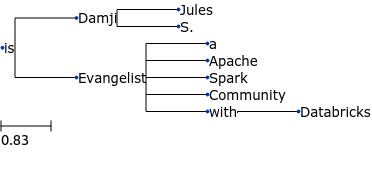

In [36]:
st = sentenceTree(list(spacy_text.sents)[0])
t, ts = st.render()
t.render('%%inline', tree_style=ts)

## Document Similarity

In [37]:
spacy_text.similarity(spacy_text)

0.99999990750743162

## Word Embeddings (Word Vectors)

In [38]:
spacy_text.vocab.morphology